In [75]:
# create a dataframe of the annotated dataset in the folder ..data/CodeQualData/py800_annotated
import os
import pandas as pd
import json

data = []
for root, dirs, files in os.walk('../data/CodeQualData/py800_annotated'):
    for file in files:
        if file.endswith(".jsonl"):
            with open(os.path.join(root, file), 'r') as f:
                for line in f:
                    data.append(json.loads(line))

#order by descending order of size
py800_annotated_df = pd.DataFrame(data)
py800_annotated_df

,problem_id,submission_id,problem_description,quality_assessment,quality_score
0,p03494,s642429606,This Python snippet takes two inputs: an integ...,{'functionality': 'The code works perfectly fi...,"{'functionality': '4', 'readability': '3', 'py..."
1,p03494,s194658803,The provided Python code accepts an integer in...,{'functionality': 'Code is functional but firs...,"{'functionality': '3', 'readability': '4', 'py..."
2,p03494,s575045794,This Python snippet takes N integers as an inp...,{'functionality': 'The code works as expected ...,"{'functionality': '4', 'readability': '3', 'py..."
3,p03494,s476321647,The code takes two inputs - an integer 'a' and...,"{'functionality': 'The code works as expected,...","{'functionality': '3', 'readability': '3', 'py..."
4,p03494,s965275653,This is a python program that reads an input N...,{'functionality': 'The code would work given t...,"{'functionality': '4', 'readability': '3', 'py..."
...,...,...,...,...,...
717,p03095,s337828734,You are given a string S of length N.\nAmong i...,{'functionality': 'The code correctly counts t...,"{'functionality': '5', 'readability': '5', 'py..."
718,p02711,s627609294,Given is a three-digit integer N. Does N conta...,{'functionality': 'The code reads a three-digi...,"{'functionality': '5', 'readability': '5', 'py..."
719,p02711,s880296625,Given is a three-digit integer N. Does N conta...,{'functionality': 'The code checks for the pre...,"{'functionality': '5', 'readability': '5', 'py..."
720,p02711,s261077690,Given is a three-digit integer N. Does N conta...,{'functionality': 'The code receives a three-d...,"{'functionality': '5', 'readability': '5', 'py..."


In [76]:
# get all the submissions in the python_800 dataset
import os
import pandas as pd
py_800_dir = '../data/CodeNet/python_800'

def read_file(file):
    with open(file, 'r') as f:
        return f.read()

data = []
for root, dirs, files in os.walk(py_800_dir):
    for file in files:
        if file.endswith(".py"):
            data.append({'problem_id': root.split('/')[-1], 'submission_id': file.strip('.py'), 'submission': read_file(os.path.join(root, file))})
py800_df = pd.DataFrame(data)
py800_df

,problem_id,submission_id,submission
0,p03494,s642429606,"n=int(input())\na=list(map(int,input().split()..."
1,p03494,s194658803,s = int(input())\ns = input().rstrip().split('...
2,p03494,s575045794,def lo2(n):\n count = 0\n while n%2==0:\...
3,p03494,s476321647,"a = int(input())\nb = list(map(int, input().sp..."
4,p03494,s965275653,"N = int(input())\nA = list(map(int,input().spl..."
...,...,...,...
239995,p02991,s289199974,import sys\ninput = sys.stdin.buffer.readline\...
239996,p02991,s007313054,"from collections import deque\n\nn, m = map(i..."
239997,p02991,s209638769,from collections import defaultdict as dd\nfro...
239998,p02991,s447876624,import sys\nfrom collections import deque\n\n\...


In [77]:
# merge the two dataframes by problem_id and submission_id
py800_annotated_df = pd.merge(py800_annotated_df, py800_df, on=['problem_id', 'submission_id'])
py800_annotated_df

,problem_id,submission_id,problem_description,quality_assessment,quality_score,submission
0,p03494,s642429606,This Python snippet takes two inputs: an integ...,{'functionality': 'The code works perfectly fi...,"{'functionality': '4', 'readability': '3', 'py...","n=int(input())\na=list(map(int,input().split()..."
1,p03494,s194658803,The provided Python code accepts an integer in...,{'functionality': 'Code is functional but firs...,"{'functionality': '3', 'readability': '4', 'py...",s = int(input())\ns = input().rstrip().split('...
2,p03494,s575045794,This Python snippet takes N integers as an inp...,{'functionality': 'The code works as expected ...,"{'functionality': '4', 'readability': '3', 'py...",def lo2(n):\n count = 0\n while n%2==0:\...
3,p03494,s476321647,The code takes two inputs - an integer 'a' and...,"{'functionality': 'The code works as expected,...","{'functionality': '3', 'readability': '3', 'py...","a = int(input())\nb = list(map(int, input().sp..."
4,p03494,s965275653,This is a python program that reads an input N...,{'functionality': 'The code would work given t...,"{'functionality': '4', 'readability': '3', 'py...","N = int(input())\nA = list(map(int,input().spl..."
...,...,...,...,...,...,...
717,p03095,s337828734,You are given a string S of length N.\nAmong i...,{'functionality': 'The code correctly counts t...,"{'functionality': '5', 'readability': '5', 'py...",from collections import Counter\n\nn = int(inp...
718,p02711,s627609294,Given is a three-digit integer N. Does N conta...,{'functionality': 'The code reads a three-digi...,"{'functionality': '5', 'readability': '5', 'py...",S=list(input())\n\nans='No'\nfor s in S:\n ...
719,p02711,s880296625,Given is a three-digit integer N. Does N conta...,{'functionality': 'The code checks for the pre...,"{'functionality': '5', 'readability': '5', 'py...","n=str(input())\nprint(""YNeos""[not ""7"" in n::2])"
720,p02711,s261077690,Given is a three-digit integer N. Does N conta...,{'functionality': 'The code receives a three-d...,"{'functionality': '5', 'readability': '5', 'py...",print('Yes' if '7' in input() else ('No'))


In [78]:
# for each row in py800_annotated_df extract the problem_id, submission_id, and the quality score
data = []
for index, row in py800_annotated_df.iterrows():
    temp_dict = {'problem_id': row['problem_id'], 'submission_id': row['submission_id'], 'submission': row['submission']}
    temp_dict.update(row['quality_score'])
    data.append(temp_dict)

# create a dataframe from the data
py800_annotated_df_score = pd.DataFrame(data)
py800_annotated_df_score



,problem_id,submission_id,submission,functionality,readability,pythonic,error_handling,efficiency
0,p03494,s642429606,"n=int(input())\na=list(map(int,input().split()...",4,3,3,1,4
1,p03494,s194658803,s = int(input())\ns = input().rstrip().split('...,3,4,3,2,3
2,p03494,s575045794,def lo2(n):\n count = 0\n while n%2==0:\...,4,3,4,1,4
3,p03494,s476321647,"a = int(input())\nb = list(map(int, input().sp...",3,3,2,1,2
4,p03494,s965275653,"N = int(input())\nA = list(map(int,input().spl...",4,3,3,1,4
...,...,...,...,...,...,...,...,...
717,p03095,s337828734,from collections import Counter\n\nn = int(inp...,5,5,5,3,5
718,p02711,s627609294,S=list(input())\n\nans='No'\nfor s in S:\n ...,5,5,5,N/A,5
719,p02711,s880296625,"n=str(input())\nprint(""YNeos""[not ""7"" in n::2])",5,5,5,4,5
720,p02711,s261077690,print('Yes' if '7' in input() else ('No')),5,5,5,4,5


In [79]:
# convert values in columns to integers, and do some clean up
py800_annotated_df_score.replace('N/A', 5, inplace=True)
py800_annotated_df_score.replace('NA', 5, inplace=True)
py800_annotated_df_score['functionality'] = py800_annotated_df_score['functionality'].astype(float)
py800_annotated_df_score['readability'] = py800_annotated_df_score['readability'].astype(float)
py800_annotated_df_score['pythonic'] = py800_annotated_df_score['pythonic'].astype(float)
py800_annotated_df_score['efficiency'] = py800_annotated_df_score['efficiency'].astype(float)
py800_annotated_df_score['error_handling'] = py800_annotated_df_score['error_handling'].astype(float)
py800_annotated_df_score.dtypes


problem_id         object
submission_id      object
submission         object
functionality     float64
readability       float64
pythonic          float64
error_handling    float64
efficiency        float64
dtype: object

In [80]:
# create a new column that contains the average of the quality scores for each submission using
# the columns functionality, readability, pythonic, efficiency, and error_handling
py800_annotated_df_score['average'] = py800_annotated_df_score[['functionality', 'readability', 'pythonic', 'efficiency', 'error_handling']].mean(axis=1)
py800_annotated_df_score


,problem_id,submission_id,submission,functionality,readability,pythonic,error_handling,efficiency,average
0,p03494,s642429606,"n=int(input())\na=list(map(int,input().split()...",4.0,3.0,3.0,1.0,4.0,3.0
1,p03494,s194658803,s = int(input())\ns = input().rstrip().split('...,3.0,4.0,3.0,2.0,3.0,3.0
2,p03494,s575045794,def lo2(n):\n count = 0\n while n%2==0:\...,4.0,3.0,4.0,1.0,4.0,3.2
3,p03494,s476321647,"a = int(input())\nb = list(map(int, input().sp...",3.0,3.0,2.0,1.0,2.0,2.2
4,p03494,s965275653,"N = int(input())\nA = list(map(int,input().spl...",4.0,3.0,3.0,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
717,p03095,s337828734,from collections import Counter\n\nn = int(inp...,5.0,5.0,5.0,3.0,5.0,4.6
718,p02711,s627609294,S=list(input())\n\nans='No'\nfor s in S:\n ...,5.0,5.0,5.0,5.0,5.0,5.0
719,p02711,s880296625,"n=str(input())\nprint(""YNeos""[not ""7"" in n::2])",5.0,5.0,5.0,4.0,5.0,4.8
720,p02711,s261077690,print('Yes' if '7' in input() else ('No')),5.0,5.0,5.0,4.0,5.0,4.8


In [81]:
# label the average quality score as good, average, or bad using the average column
def label_quality(row):
    if row['average'] >= 4.5:
        return 'HIGH'
    elif row['average'] >= 3.5 and row['average'] < 4.5:
        return 'AVERAGE'
    else:
        return 'LOW'
    
py800_annotated_df_score['quality'] = py800_annotated_df_score.apply(lambda row: label_quality(row), axis=1)
py800_annotated_df_score


,problem_id,submission_id,submission,functionality,readability,pythonic,error_handling,efficiency,average,quality
0,p03494,s642429606,"n=int(input())\na=list(map(int,input().split()...",4.0,3.0,3.0,1.0,4.0,3.0,LOW
1,p03494,s194658803,s = int(input())\ns = input().rstrip().split('...,3.0,4.0,3.0,2.0,3.0,3.0,LOW
2,p03494,s575045794,def lo2(n):\n count = 0\n while n%2==0:\...,4.0,3.0,4.0,1.0,4.0,3.2,LOW
3,p03494,s476321647,"a = int(input())\nb = list(map(int, input().sp...",3.0,3.0,2.0,1.0,2.0,2.2,LOW
4,p03494,s965275653,"N = int(input())\nA = list(map(int,input().spl...",4.0,3.0,3.0,1.0,4.0,3.0,LOW
...,...,...,...,...,...,...,...,...,...,...
717,p03095,s337828734,from collections import Counter\n\nn = int(inp...,5.0,5.0,5.0,3.0,5.0,4.6,HIGH
718,p02711,s627609294,S=list(input())\n\nans='No'\nfor s in S:\n ...,5.0,5.0,5.0,5.0,5.0,5.0,HIGH
719,p02711,s880296625,"n=str(input())\nprint(""YNeos""[not ""7"" in n::2])",5.0,5.0,5.0,4.0,5.0,4.8,HIGH
720,p02711,s261077690,print('Yes' if '7' in input() else ('No')),5.0,5.0,5.0,4.0,5.0,4.8,HIGH


In [82]:
# group the number of submissions by quality
py800_annotated_df_score.groupby('quality').size()

quality
AVERAGE    353
HIGH        98
LOW        271
dtype: int64

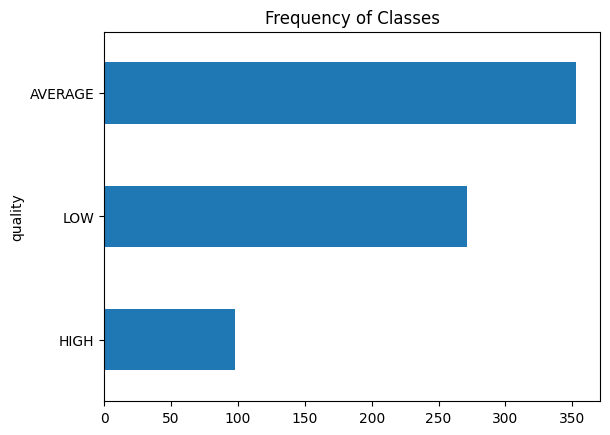

In [83]:
import matplotlib.pyplot as plt

py800_annotated_df_score["quality"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [84]:
# how long are the submissions
py800_annotated_df_score['submission_length'] = py800_annotated_df_score['submission'].apply(lambda x: len(x.split()))
py800_annotated_df_score['submission_length'].describe()

count    722.000000
mean      41.566482
std       35.494590
min        1.000000
25%       20.000000
50%       35.000000
75%       48.000000
max      326.000000
Name: submission_length, dtype: float64

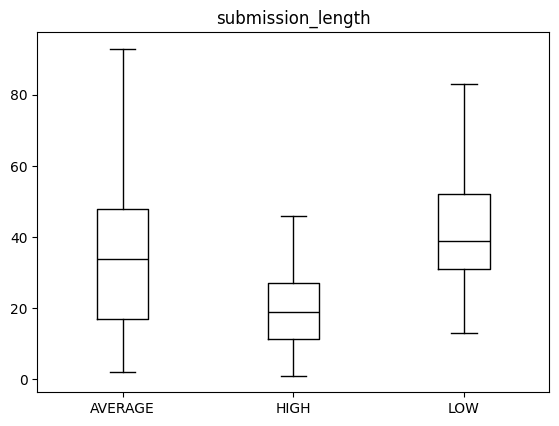

In [85]:
import matplotlib.pyplot as plt
py800_annotated_df_score.boxplot("submission_length", by="quality", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [86]:
# save the annotated dataset to a jsonl file
py800_annotated_df_score.to_json('../data/CodeQualData/py800_annotated.jsonl', orient='records', lines=True)